Data Set Link: https://public.roboflow.com/object-detection/license-plates-us-eu

In [1]:
import os
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

In [2]:
def load_images_and_annotations(base_path):
    """
    Load images and annotations from the dataset folders.
    """
    categories = ['test', 'train', 'valid']
    data = {category: {'images': [], 'annotations': []} for category in categories}
    image_counts = {}

    for category in categories:
        images_path = os.path.join(base_path, category, 'images')
        labels_path = os.path.join(base_path, category, 'labels')

        images = [img for img in os.listdir(images_path) if img.endswith('.jpg')]
        data[category]['images'].extend(images)
        image_counts[category] = len(images)

        for img in images:
            annotation_file = img.replace('.jpg', '.txt')
            with open(os.path.join(labels_path, annotation_file), 'r') as file:
                annotations = file.readlines()
            data[category]['annotations'].append(annotations)

    return data, image_counts

In [3]:
def plot_image_counts(image_counts):
    """
    Plot a bar graph of image counts in each category.
    """
    categories = list(image_counts.keys())
    counts = [image_counts[category] for category in categories]

    plt.bar(categories, counts)
    plt.xlabel('Category')
    plt.ylabel('Number of Images')
    plt.title('Image Counts in Dataset Categories')
    plt.show()

In [4]:
# Base path for the dataset
base_path = 'datasets'

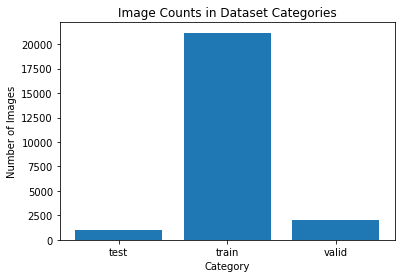

In [5]:
# Load images and annotations
data, image_counts = load_images_and_annotations(base_path)

# Plot image counts
plot_image_counts(image_counts)



Displaying images from test category:


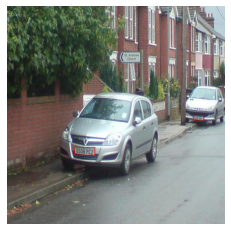

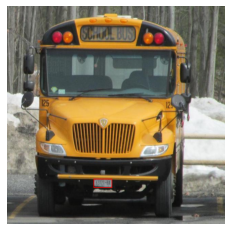

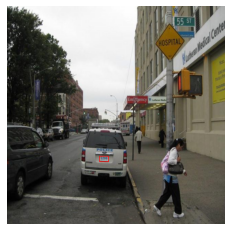

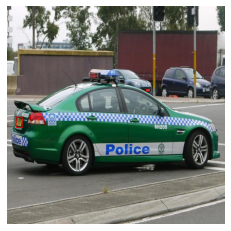

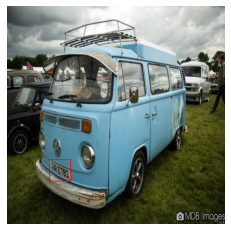

Displaying images from train category:


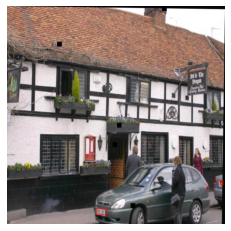

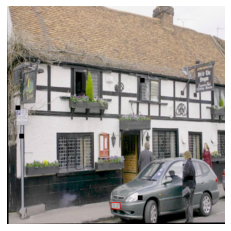

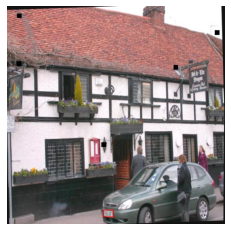

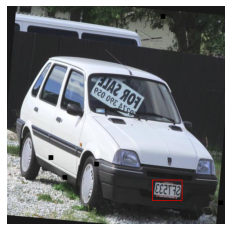

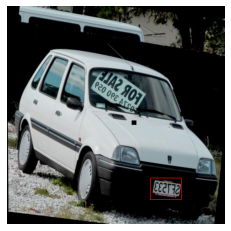

Displaying images from valid category:


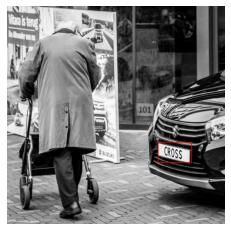

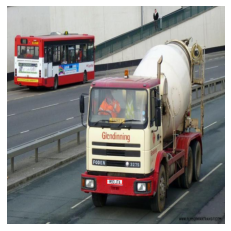

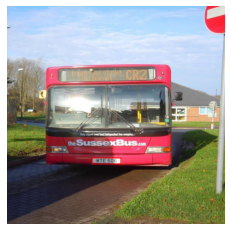

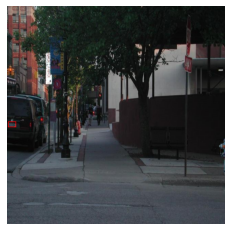

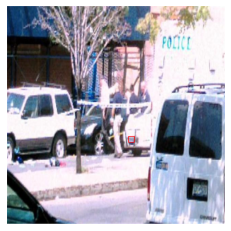

Displaying images from test category:


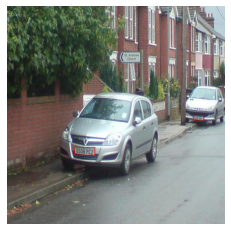

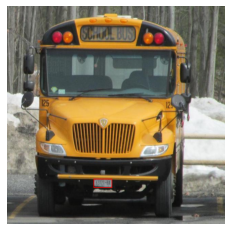

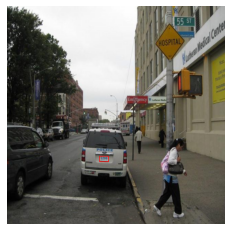

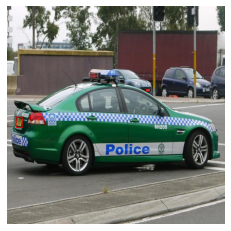

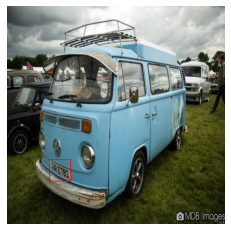

Displaying images from train category:


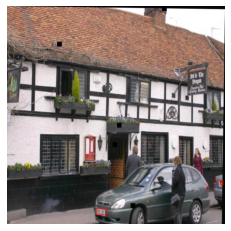

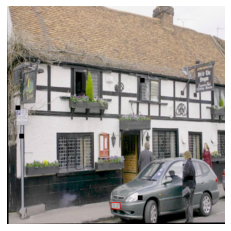

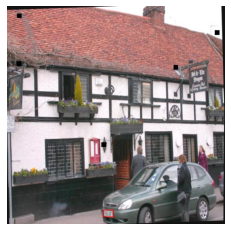

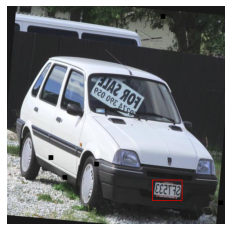

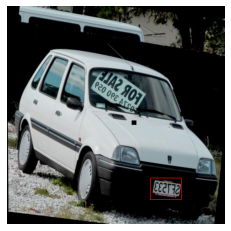

Displaying images from valid category:


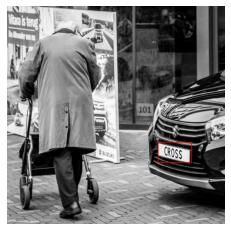

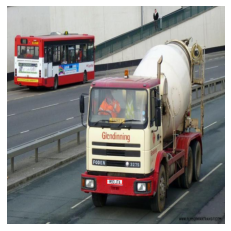

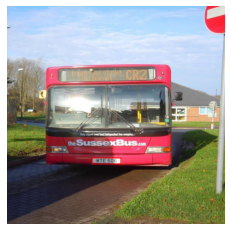

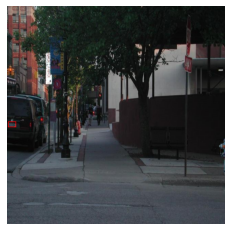

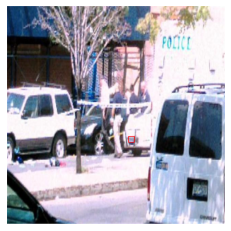

In [13]:
def display_images_with_annotations(data, base_path, num_images=5):
    """
    Display images with bounding boxes from annotations.
    """
    for category in data:
        print(f"Displaying images from {category} category:")
        for i in range(num_images):
            image_path = os.path.join(base_path, category, 'images', data[category]['images'][i])
            image = Image.open(image_path)
            draw = ImageDraw.Draw(image)

            annotation_file_name = data[category]['images'][i].replace('.jpg', '.txt')
            annotation_file_path = os.path.join(base_path, category, 'labels', annotation_file_name)

            with open(annotation_file_path, 'r') as file:
                annotations = file.readlines()

            for annotation in annotations:
                # Parse YOLO annotation format
                _, x_center, y_center, width, height = map(float, annotation.split())
                img_width, img_height = image.size
                x_center *= img_width
                y_center *= img_height
                width *= img_width
                height *= img_height
                bbox = [x_center - width / 2, y_center - height / 2, x_center + width / 2, y_center + height / 2]
                draw.rectangle(bbox, outline="red", width=2)

            plt.imshow(image)
            plt.axis('off')
            plt.show()

# Call the function to display images with annotations
display_images_with_annotations(data, base_path, num_images=5)

# Display images with annotations
display_images_with_annotations(data, base_path, num_images=5)